In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sanjanchaudhari_population_dataset_path = kagglehub.dataset_download('sanjanchaudhari/population-dataset')

print('Data source import complete.')


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-dataset/2015.csv


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [5]:
data = pd.read_csv('/kaggle/input/population-dataset/2015.csv')
data.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
61,Croatia,Central and Eastern Europe,62,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
25,Germany,Western Europe,26,6.750,0.01848,1.32792,1.29937,0.89186,0.61477,0.21843,0.28214,2.11569
30,Czech Republic,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634


In [6]:
print("shape of data\n",data.shape)
print("\ncount of null value\n",data.isnull().sum())
print("\ncount of duplicated value",data.duplicated().sum())

shape of data
 (158, 12)

count of null value
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

count of duplicated value 0


In [7]:
data.describe()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


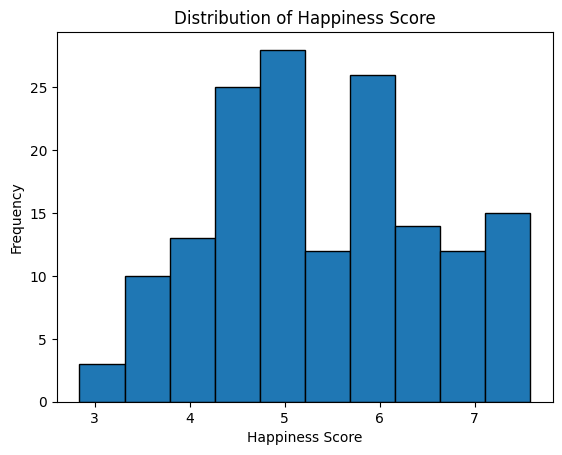

In [8]:
# Histogram of Happiness Score
plt.hist(data['Happiness Score'], bins=10, edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.show()

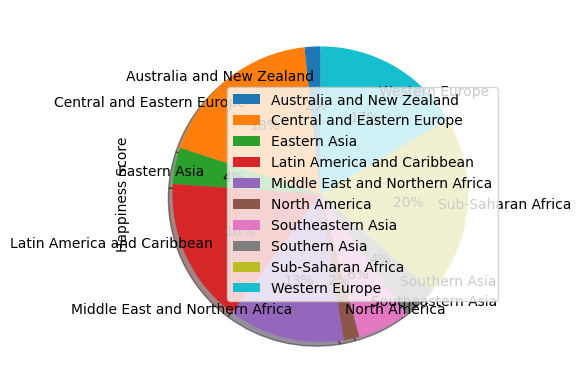

In [9]:
texts=data.groupby(['Region']).sum().plot(kind='pie', y='Happiness Score',autopct='%1.0f%%',shadow=True,startangle=90,labeldistance=0.8)



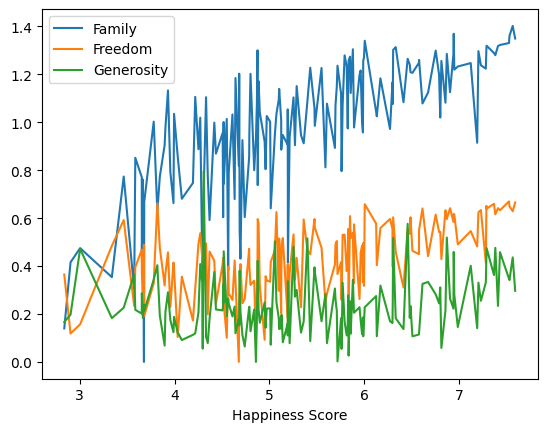

In [10]:
 data.plot(x="Happiness Score", y=["Family","Freedom","Generosity"])
 plt.show()

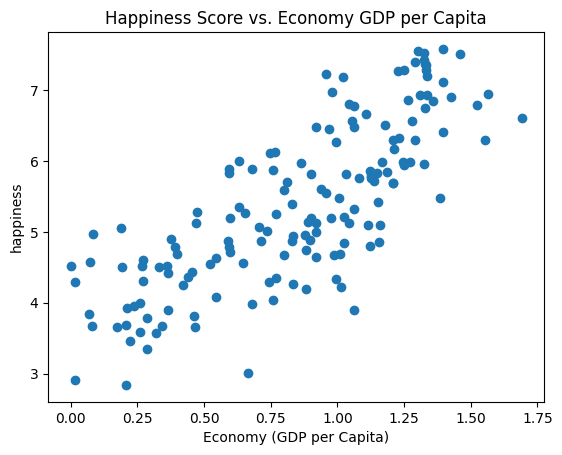

In [11]:
# Scatter plot: Happiness Score vs. Economy GDP per Capita
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('happiness')
plt.title('Happiness Score vs. Economy GDP per Capita')
plt.show()

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

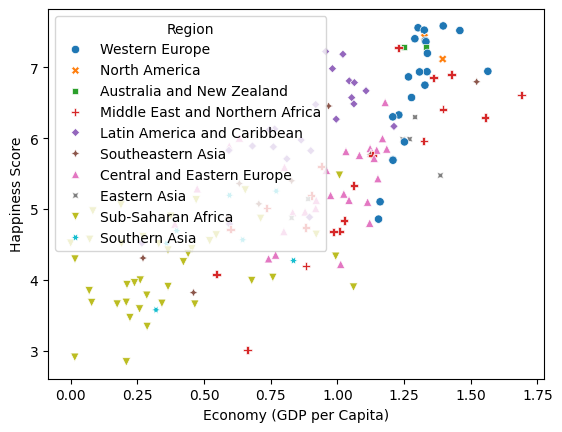

In [12]:
sns.scatterplot(data=data,x=data['Economy (GDP per Capita)'],y=data['Happiness Score'],hue="Region",style="Region")


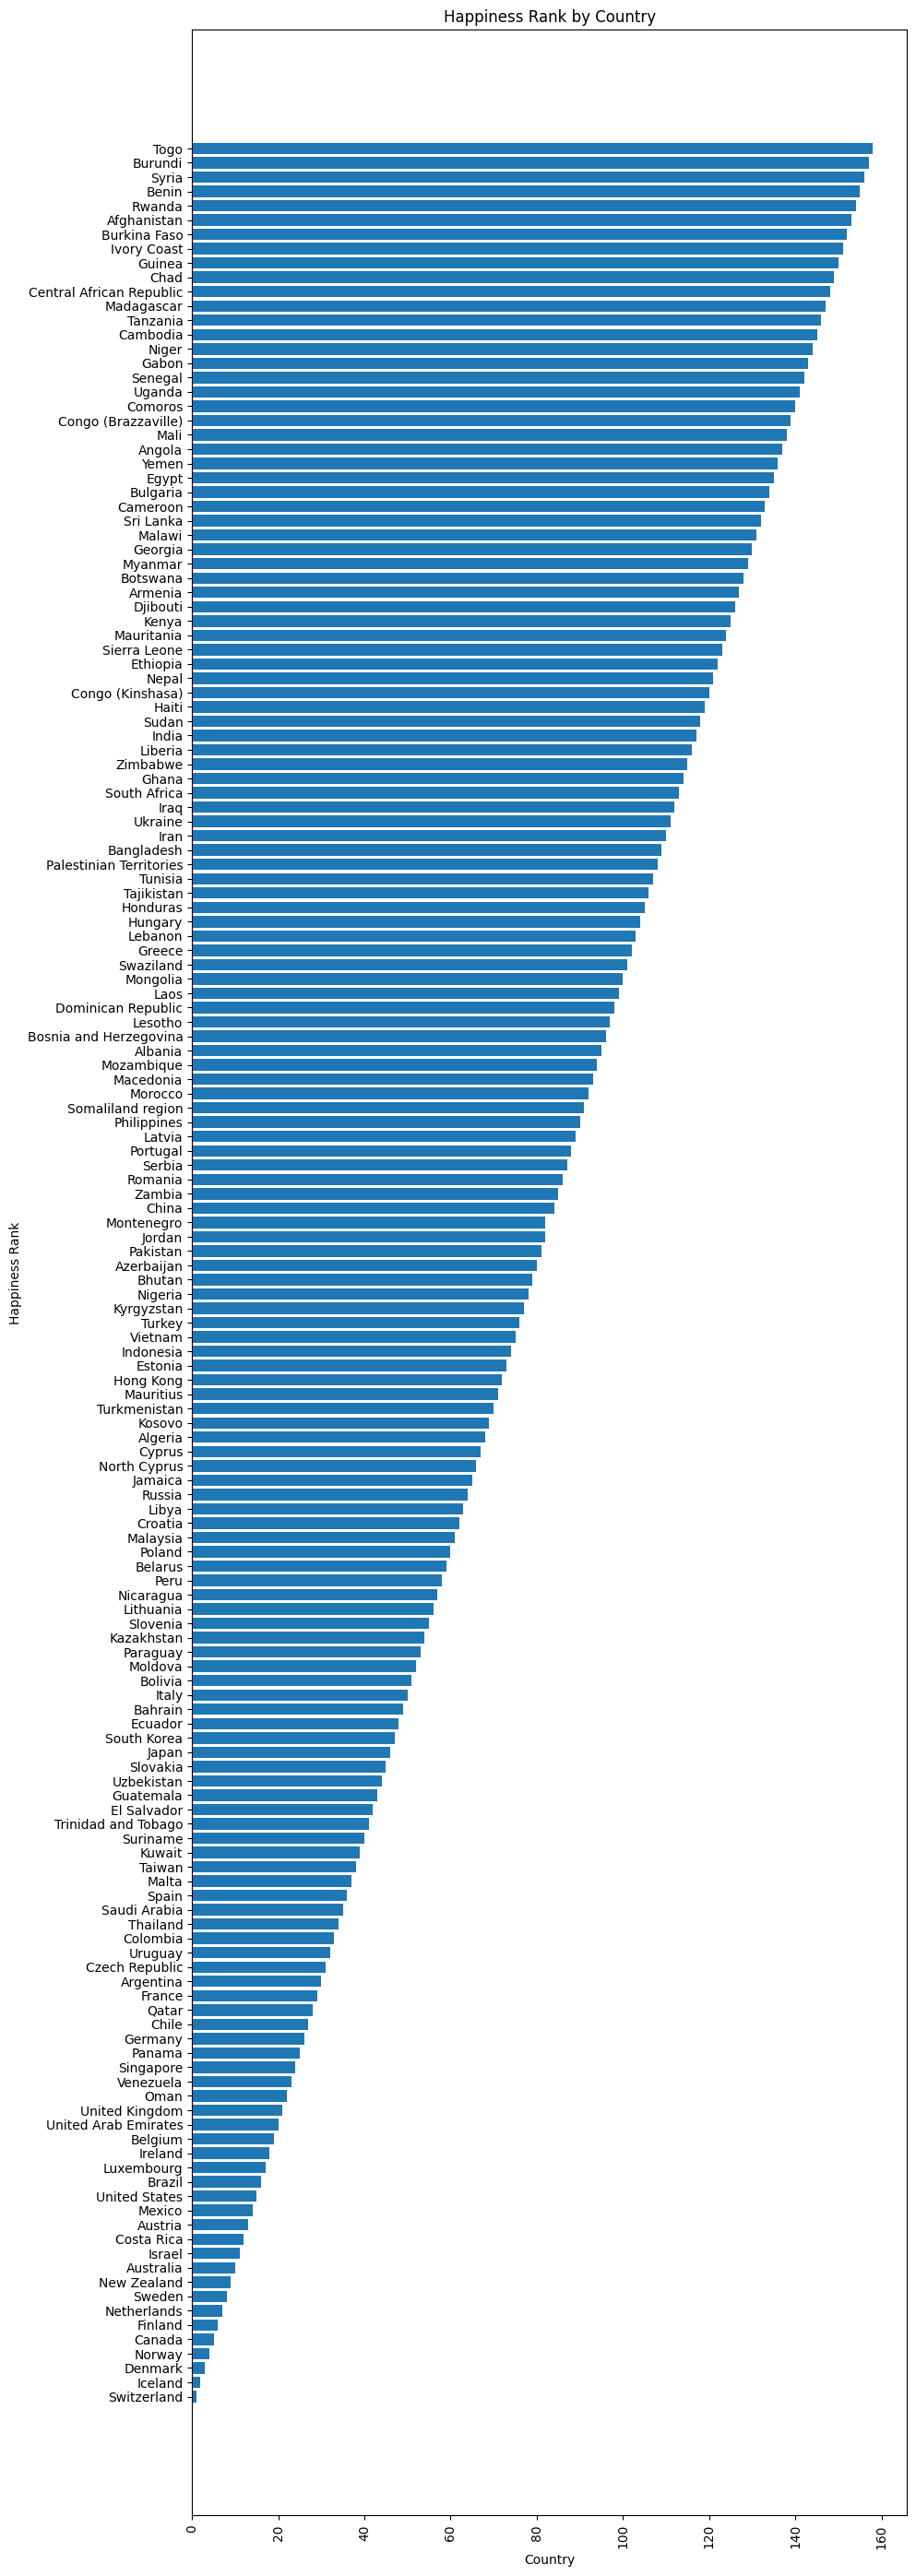

In [13]:
# Bar chart: Happiness Rank by Country
plt.figure(figsize=(10, 35))
df_sorted = data.sort_values('Happiness Rank', ascending=True)
plt.barh(df_sorted['Country'], df_sorted['Happiness Rank'])
plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.title('Happiness Rank by Country')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Correlation matrix
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Switzerland'

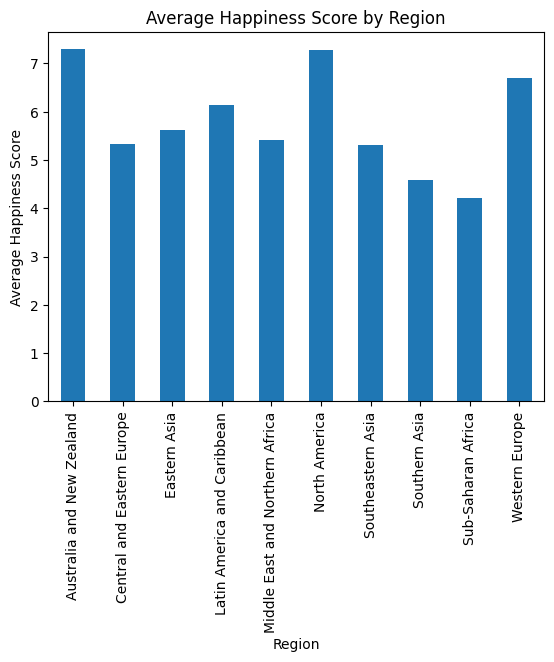

In [15]:
# 1. How does the Happiness Score vary across different regions?
data.groupby('Region')['Happiness Score'].mean().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Region')
plt.show()


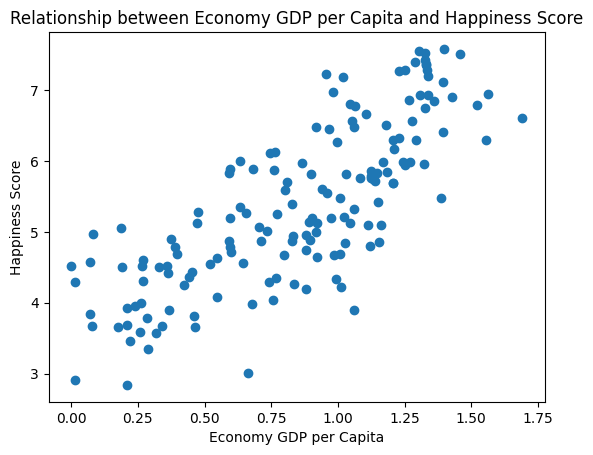

In [16]:
# 2. What is the relationship between Economy GDP per Capita and Happiness Score?
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'])
plt.xlabel('Economy GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between Economy GDP per Capita and Happiness Score')
plt.show()